# 모델 선택 (Model Selection)

## 학습 목표
1. **교차 검증(Cross Validation)** 의 개념과 필요성을 이해할 수 있다
2. **K-Fold**, **Stratified K-Fold** 교차 검증을 구현할 수 있다
3. **GridSearchCV** 를 사용하여 최적의 하이퍼파라미터를 탐색할 수 있다
4. **과대적합(Overfitting)** 과 **과소적합(Underfitting)** 의 개념을 이해할 수 있다
5. 학습 곡선과 검증 곡선을 통해 모델 성능을 분석할 수 있다

## 주요 내용
- train_test_split vs Cross Validation
- K-Fold 교차 검증 구현
- cross_val_score 함수 사용법
- GridSearchCV / RandomizedSearchCV
- 하이퍼파라미터 튜닝 전략
- 학습 곡선(Learning Curve) 분석

## **1. 학습/테스트 데이터 세트 분리 : train_test_split()**

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=14)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# 학습된 데이터로 예측 수행
pred = dt_clf.predict(X_test)
print('예측 정확도: ', accuracy_score(y_test, pred))

예측 정확도:  0.9666666666666667


## **2. 교차 검증(Cross Validation)**
위의 방법으로 고정된 학습용 데이터와 테스트 데이터를 나누어 모델을 평가할 때는 과적합(Overfitting)에 취약하다.

교차 검증 : 결국 모의고사를 많이 보는 것 --> 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 셋과 검증 데이터 셋에서 학습과 평가를 수행한다.

이 결과를 바탕으로 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.
<br>
<br>

#### **(1) K-Fold 교차검증(K-Fold Cross Validation)**¶

K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증평가를 반복적으로 수행하는 방법이다.

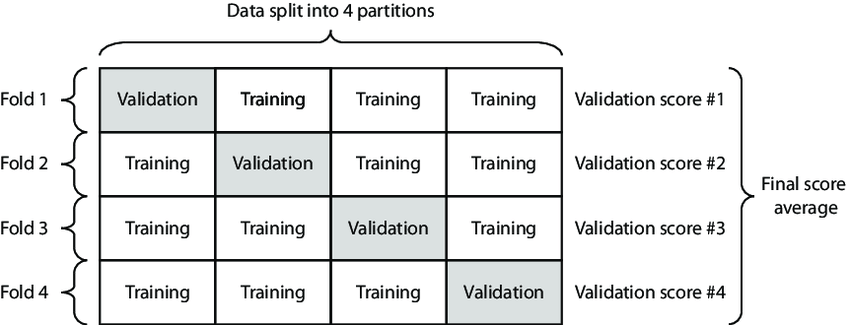

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 6개의 데이터셋을 나눌 K-fold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=6)
cv_accuracy = []
print('붓꽃 데이터세트 크기: ', features.shape[0])

붓꽃 데이터세트 크기:  150


* IRIS Dataset의 갯수는 150개 이므로, KFold(n_splits= 6) 설정하면 150개의 데이터셋을 학습용 125개, 테스트용 25개로 이루어진 세트를 6번 만든다.

* KFold 객체는 split() 을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환하므로 실제 분할된 데이터 추출은 코드로 직접 수행해야 한다.

In [3]:
num_iter = 0 

for train_index, test_index in kfold.split(features):
    # kfold.split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 세트 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    num_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(num_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(num_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균검증 정확도: ', np.mean(cv_accuracy))


1 교차검증 정확도 : 1.0, 학습 데이터 크기 : 125, 검증 데이터 크기 : 25
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

2 교차검증 정확도 : 1.0, 학습 데이터 크기 : 125, 검증 데이터 크기 : 25
#2 검증 세트 인덱스: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

3 교차검증 정확도 : 0.92, 학습 데이터 크기 : 125, 검증 데이터 크기 : 25
#3 검증 세트 인덱스: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]

4 교차검증 정확도 : 0.88, 학습 데이터 크기 : 125, 검증 데이터 크기 : 25
#4 검증 세트 인덱스: [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99]

5 교차검증 정확도 : 0.92, 학습 데이터 크기 : 125, 검증 데이터 크기 : 25
#5 검증 세트 인덱스: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124]

6 교차검증 정확도 : 0.8, 학습 데이터 크기 : 125, 검증 데이터 크기 : 25
#6 검증 세트 인덱스: [125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149]

## 평균검증 정확도:  0.9199999999999999


#### **(2) Stratified KFold**

* 불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식

* 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

In [5]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']  = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


##교차 검증: 1
학습 레이블 데이터 분포: 
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
0    50
Name: count, dtype: int64

##교차 검증: 2
학습 레이블 데이터 분포: 
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
1    50
Name: count, dtype: int64

##교차 검증: 3
학습 레이블 데이터 분포: 
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
2    50
Name: count, dtype: int64


* 위 결과를 보면, 3개의 폴드 세트로 생성된 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됨

* 이런 상태에서 학습모델로 검증데이터를 예측하면 정확도가 0이 나오게 됨

* StratifiedKFold 는 분할된 데이터 세트가 전체 레이블 값의 분포를 반영하지 못하는 문제를 해결 해줌

* 실행방법은 거의 비슷하지만 split 메서드에 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요함

In [6]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n## 교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


## 교차검증: 1
학습 레이블 데이터 분포: 
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
0    17
1    17
2    16
Name: count, dtype: int64

## 교차검증: 2
학습 레이블 데이터 분포: 
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
0    17
2    17
1    16
Name: count, dtype: int64

## 교차검증: 3
학습 레이블 데이터 분포: 
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [7]:
# 붓꽃 데이터 세트에서 Stratified Kfold 를 이용한 검증

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('{0} 교차검증 정확도: {1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    cv_accuracy.append(accuracy)
    
# 교차검증별 정확도 및 평균정확도 계산
print('\n 교차검증별 정확도: ', cv_accuracy)
print('## 평균 검증 정확도: ', np.mean(cv_accuracy))

1 교차검증 정확도: 0.98, 학습데이터 크기: 100, 검증데이터 크기: 50
2 교차검증 정확도: 0.94, 학습데이터 크기: 100, 검증데이터 크기: 50
3 교차검증 정확도: 0.98, 학습데이터 크기: 100, 검증데이터 크기: 50

 교차검증별 정확도:  [0.98, 0.94, 0.98]
## 평균 검증 정확도:  0.9666666666666667


* 일반적으로 분류에서의 교차검증은 KFold가 아니라 Stratified Kfold로 분할이 되어야함

* 회귀에서는 결정값이 이산형의 레이블이 아니라 연속된 숫자 값이기 때문에 Stratified Kfold가 지원되지 않음

#### **(3) cross_val_score() : 교차 검증을 보다 간단하게**

cross_val_score() API는 아래의 과정을 한번에 수행한다.  
  
(1) 폴드 세트 설정 <br>
(2) for 루프 반복으로 학습 및 테스트 데이터의 인덱스를 추출 <br>   (3) 반복적으로 학습과 예측을 수행하고 예측수행을 반환 <br>

cross_val_score() API의 선언형태  
--> cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose =0, fit_params=None, pre_dispatch = '2*n_jobs')
  
estimator : 예측모델  
X : 피처 데이터 세트  
y : 레이블 데이터 세트,  
scoring : 예측성능평가 지표  
cv : 교차검증 폴드 수   <br>
* estimator로 classifier가 입력되면 Stratified Kfold 방식으로 학습/테스트 데이터 세트 분할   
* 수행 후 scoring 파라미터 값으로 지정된 성능 지표를 배열 형태로 반환

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능지표는 정확도(accuracy), 교차검증 세트는 3개
# 모델 하나를 학습 + Cross Validation으로 성능 평가
scores = cross_val_score(dt_clf, data, label, cv =3 , scoring = 'accuracy')
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


#### **(4) GridSearchCV - 교차검증과 하이퍼파라미터 튜닝을 한번에**
GridSearchCV를 이용하여 모델에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 도출

**GridSearch의 주요 파라미터**

**estimator** : 적용 알고리즘 모델로 classifier, regressor, pipeline 등이 사용  <br>
**param_grid** : 튜닝을 위한 파라메터 (파라메터는 dictionary 타입) <br>
**scoring** : 예측 성능을 평가할 평가 방법을 지정, 문자열로 사이킷런의 성능평가 지표를 입력하나 별도의 함수 지정도 가능. (보통 accuracy 사용) <br>
**refit** : 기본값은 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파리미터로 재학습시킴 <br>

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라메터를 딕셔너리 형태로 설정
# 파라메터의 이름은 각 모델의 문서를 참조한다.
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
parameters = {'max_depth' : [1, 2, 3, 4, 5, 6], 'min_samples_split' : [2, 3, 4, 5, 6]}

학습 데이터 세트를 GridSearchCV 객체의 fit 메서드에 인자로 입력
* 학습데이터를 cv에 입력된 폴딩 수로 분할
* param_grid에 기술된 하이퍼파라미터로 순차적으로 변경하며 학습/평가 수행
* 개별 평가결과 : cvresults 에 기록
* 최고 성능 파라미터 : bestparams 에 기록
* 최고 점수 : bestscores 에 기록

In [10]:
# Model은 Decision Tree, 튜닝을 위한 파라메터는 parameters
# cv=3 교차검층을 위해 3개로 분할
# refit=True 최적의 하이퍼파라메터로 재학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습, 평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 데이터 프레임으로 반환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,26,0.700,0.7,0.700
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,26,0.700,0.7,0.700
2,"{'max_depth': 1, 'min_samples_split': 4}",0.700000,26,0.700,0.7,0.700
3,"{'max_depth': 1, 'min_samples_split': 5}",0.700000,26,0.700,0.7,0.700
4,"{'max_depth': 1, 'min_samples_split': 6}",0.700000,26,0.700,0.7,0.700
5,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,15,0.925,1.0,0.950
6,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,15,0.925,1.0,0.950
7,"{'max_depth': 2, 'min_samples_split': 4}",0.958333,15,0.925,1.0,0.950
8,"{'max_depth': 2, 'min_samples_split': 5}",0.958333,15,0.925,1.0,0.950
9,"{'max_depth': 2, 'min_samples_split': 6}",0.958333,15,0.925,1.0,0.950


위와 같이 파라미터를 설정했다면 GridSearch에서는 아래와 같이 순차적으로 파라미터 조합을 적용하여 실행

In [11]:
print('GridSearch 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearch 최고 점수: ', grid_dtree.best_score_)

GridSearch 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearch 최고 점수:  0.975


refit = True 이면, GridSearchCV가 이미 최적 성능을 나타내는 하이퍼파라미터로 Estimator를 학습해 bestestimator 로 저장했음

In [12]:
# GridSearchCV의 refit으로 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estmator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터세트 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터세트 정확도:  0.9667


위의 코드는 아래 사이트를 참조하였다.
https://injo.tistory.com/10

---

## (5) Optuna - 더 효율적인 하이퍼파라미터 최적화

### GridSearchCV vs Optuna 비교

| 특성 | GridSearchCV | Optuna |
|------|-------------|--------|
| **탐색 방식** | 완전 탐색 (모든 조합 시도) | 베이지안 최적화 (TPE 알고리즘) |
| **효율성** | 조합 수에 비례해 시간 증가 | 이전 결과를 학습하여 지능적 탐색 |
| **조기 종료** | 없음 | Pruning으로 비효율적 trial 조기 중단 |
| **연속형 파라미터** | 직접 이산화 필요 | 연속 범위 자연스럽게 처리 |
| **시각화** | 별도 구현 필요 | 내장 시각화 도구 제공 |

### Optuna의 장점
1. **효율성**: 같은 시간에 더 좋은 결과를 찾을 가능성이 높음
2. **Pruning**: 학습 중간에 성능이 나쁘면 조기 종료하여 시간 절약
3. **유연성**: 연속형, 이산형, 범주형 파라미터 모두 지원
4. **시각화**: 최적화 과정을 쉽게 시각화 가능

In [10]:
# Optuna 설치 (필요시)
# !pip install optuna
# !pip install tqdm
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

print(f"Optuna version: {optuna.__version__}")

Optuna version: 4.6.0


### Optuna 기본 사용법

Optuna는 **objective 함수**를 정의하고, 이 함수를 최적화하는 방식으로 동작합니다.

In [ ]:
# Decision Tree에 대한 Optuna objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # 모델 생성
    dtree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # 교차 검증으로 성능 평가
    scores = cross_val_score(dtree, X_train, y_train, cv=3, scoring='accuracy')
    
    return scores.mean()

# Study 생성 및 최적화 실행
sampler = TPESampler(seed=42)  # 재현성을 위한 시드 설정
study = optuna.create_study(
    direction='maximize',  # 정확도 최대화
    sampler=sampler
)

# 최적화 실행 (n_trials: 시도 횟수)
# 50번 안에서 최적값을 찾아봐.->어려우면 늘려주기 (전체 경우의 수는 1800...;;)
study.optimize(objective, n_trials=50, show_progress_bar=True)

[I 2026-01-19 14:44:32,159] A new study created in memory with name: no-name-08f9d081-d97c-4ba5-a508-7367b07124a2
Best trial: 4. Best value: 0.925:  18%|█▊        | 9/50 [00:00<00:00, 43.88it/s]   

[I 2026-01-19 14:44:32,183] Trial 0 finished with value: 0.9166666666666666 and parameters: {'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9166666666666666.
[I 2026-01-19 14:44:32,211] Trial 1 finished with value: 0.9166666666666666 and parameters: {'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9166666666666666.
[I 2026-01-19 14:44:32,232] Trial 2 finished with value: 0.9166666666666666 and parameters: {'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9166666666666666.
[I 2026-01-19 14:44:32,252] Trial 3 finished with value: 0.9166666666666666 and parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9166666666666666.
[I 2026-01-19 14:44:32,276] Trial 4 finished with value: 0.9250000000000002 and parameters: {'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 4 w

[I 2026-01-19 14:44:32,380] Trial 10 finished with value: 0.9083333333333333 and parameters: {'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,398] Trial 11 finished with value: 0.9166666666666666 and parameters: {'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,418] Trial 12 finished with value: 0.9166666666666666 and parameters: {'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,435] Trial 13 finished with value: 0.9083333333333333 and parameters: {'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,449] Trial 14 finished with value: 0.9083333333333333 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is tri

Best trial: 4. Best value: 0.925:  62%|██████▏   | 31/50 [00:00<00:00, 53.92it/s]

[I 2026-01-19 14:44:32,553] Trial 21 finished with value: 0.9250000000000002 and parameters: {'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,569] Trial 22 finished with value: 0.9250000000000002 and parameters: {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,587] Trial 23 finished with value: 0.9250000000000002 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,606] Trial 24 finished with value: 0.9083333333333333 and parameters: {'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,636] Trial 25 finished with value: 0.9083333333333333 and parameters: {'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial

Best trial: 4. Best value: 0.925:  82%|████████▏ | 41/50 [00:00<00:00, 55.04it/s]

[I 2026-01-19 14:44:32,750] Trial 31 finished with value: 0.9250000000000002 and parameters: {'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,766] Trial 32 finished with value: 0.9250000000000002 and parameters: {'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,785] Trial 33 finished with value: 0.9166666666666666 and parameters: {'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,806] Trial 34 finished with value: 0.9083333333333333 and parameters: {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,827] Trial 35 finished with value: 0.9166666666666666 and parameters: {'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial

Best trial: 4. Best value: 0.925: 100%|██████████| 50/50 [00:00<00:00, 54.94it/s]

[I 2026-01-19 14:44:32,938] Trial 42 finished with value: 0.9250000000000002 and parameters: {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,963] Trial 43 finished with value: 0.9083333333333333 and parameters: {'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:32,984] Trial 44 finished with value: 0.9083333333333333 and parameters: {'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:33,001] Trial 45 finished with value: 0.9083333333333333 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.9250000000000002.
[I 2026-01-19 14:44:33,025] Trial 46 finished with value: 0.9083333333333333 and parameters: {'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 

In [15]:
# 최적화 결과 확인
print("=" * 50)
print("Optuna 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study.best_params}")
print(f"최고 점수: {study.best_value:.4f}")
print(f"총 시도 횟수: {len(study.trials)}")

Optuna 최적화 결과
최적 파라미터: {'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 3}
최고 점수: 0.9833
총 시도 횟수: 50


### Optuna 시각화

Optuna는 최적화 과정을 시각화하는 다양한 도구를 제공합니다.

In [16]:
# 최적화 히스토리 시각화
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [17]:
# 파라미터 중요도 시각화
fig = optuna.visualization.plot_param_importances(study)
fig.show()

### 최적 파라미터로 모델 학습 및 평가

In [18]:
# 최적 파라미터로 모델 생성 및 학습
best_dtree = DecisionTreeClassifier(**study.best_params, random_state=42)
best_dtree.fit(X_train, y_train)

# 테스트 데이터로 예측
pred = best_dtree.predict(X_test)
print(f"Optuna 최적화 모델 테스트 정확도: {accuracy_score(y_test, pred):.4f}")

Optuna 최적화 모델 테스트 정확도: 0.9667


### Optuna 추가 기능

**1. Pruning (조기 종료)**
- 학습 중간에 성능이 좋지 않은 trial을 조기에 종료
- `MedianPruner`, `SuccessiveHalvingPruner` 등 다양한 Pruner 제공

**2. 다양한 파라미터 타입 지원**
```python
# 정수형
trial.suggest_int('n_estimators', 10, 200)

# 실수형
trial.suggest_float('learning_rate', 0.001, 0.1, log=True)

# 범주형
trial.suggest_categorical('criterion', ['gini', 'entropy'])
```

**3. 결과 저장 및 재개**
```python
# SQLite에 결과 저장
study = optuna.create_study(storage='sqlite:///study.db')

# 이전 study 불러와서 계속 진행
study = optuna.load_study(study_name='my_study', storage='sqlite:///study.db')
```

**참고 자료**
- [Optuna 공식 문서](https://optuna.readthedocs.io/)
- [Optuna GitHub](https://github.com/optuna/optuna)